# Session 2 TP 
## In this lab, you will implement from scratch:
1. Histogram spreading
2. Histogram equalization
3. Convolution operation
4. Denoising using convolution (Gaussian filter)
5. Edge detection using convolution (Sobel filter)
6. Image sharpening using convolution (Laplacian filter)
7. Detecting corners using convolution (Harris corner detector)
8. Detecting points of interest
9. Image segmentation using K-means clustering

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.data import *
from skimage.data import astronaut
import cv2

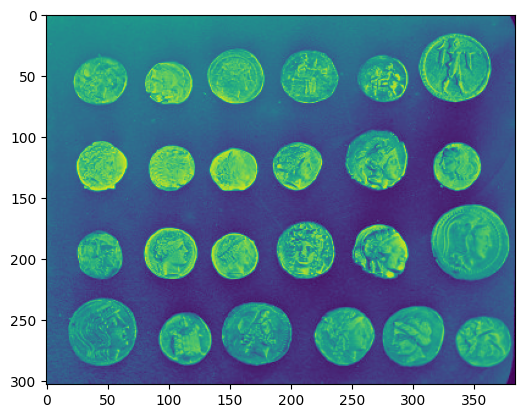

In [28]:
plt.imshow(coins())

(array([67., 16., 12., 54., 39., 21., 16.,  8., 12., 11.]),
 array([   0. ,  126.4,  252.8,  379.2,  505.6,  632. ,  758.4,  884.8,
        1011.2, 1137.6, 1264. ]),
 <BarContainer object of 10 artists>)

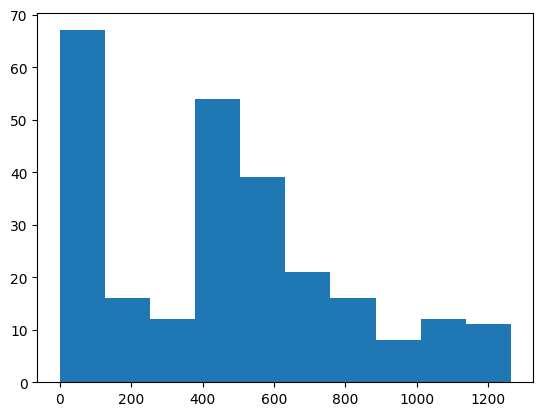

In [3]:
# Load an image from the skimage library

# Function to calculate the histogram of an image
def histogram(image):
    histogram = np.zeros(256)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            intensity = int(image[i, j])
            histogram[intensity] += 1
    return histogram
plt.hist(histogram(coins()))

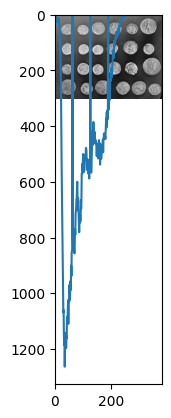

In [4]:
img = coins()

# 1. Histogram spreading
def normal(val, min_val, max_val):
    return (val - min_val) / (max_val - min_val) * 255

def histogram_spreading(image: np.ndarray) -> np.ndarray:
    min_val = image.min()
    max_val = image.max()
    image = np.vectorize(normal)(image, min_val, max_val)
    hist = histogram(image)
    return image, hist

# Test your implementation and plot the results
plt.imshow(histogram_spreading(img)[0], cmap='gray')
plt.plot(histogram_spreading(img)[1])

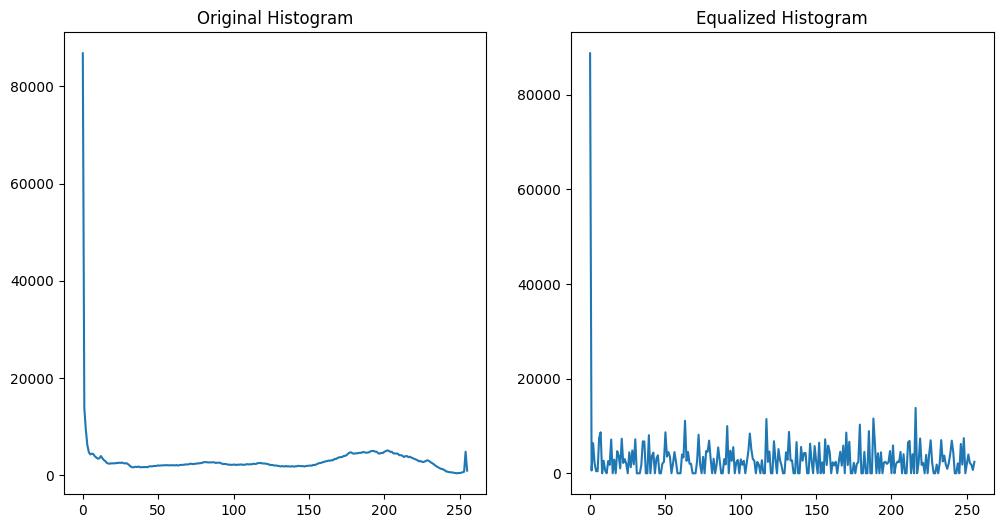

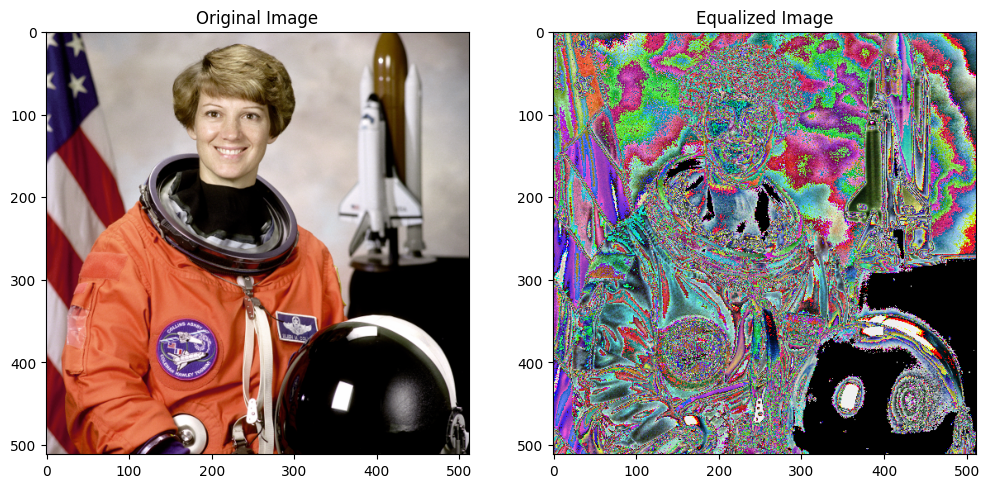

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.data import coins

def normal(val, min_val, max_val):
    return (val - min_val) / (max_val - min_val) * 255

def histogram_equalization(image: np.ndarray) -> np.ndarray:
    # Calculate the histogram manually
    hist = np.zeros(256)
    for pixel in image.flatten():
        hist[int(pixel)] += 1
    
    # Compute the CDF manually
    cdf = np.zeros(256)
    cdf[0] = hist[0]
    for i in range(1, 256):
        cdf[i] = cdf[i - 1] + hist[i]
    
    # Normalize the CDF
    cdf_min = cdf.min()
    cdf_max = cdf.max()
    cdf_normalized = (cdf - cdf_min) / (len(image) - cdf_min) * 255
    cdf_normalized = cdf_normalized.astype('uint8')
    
    # Map the original pixel values to the equalized values using the CDF
    image_equalized = cdf_normalized[image.astype('uint8')]
    
    # Calculate the histogram of the equalized image
    hist_equalized = np.zeros(256)
    for pixel in image_equalized.flatten():
        hist_equalized[int(pixel)] += 1
    
    return image_equalized, hist, hist_equalized

# Test your implementation and plot the results
img = astronaut()
image_equalized, hist, hist_equalized = histogram_equalization(img)

# Plot the original histogram
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Original Histogram")
plt.plot(hist)

# Plot the equalized histogram
plt.subplot(1, 2, 2)
plt.title("Equalized Histogram")
plt.plot(hist_equalized)
plt.show()

# Display the original and equalized images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(img, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Equalized Image")
plt.imshow(image_equalized, cmap='gray')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.data import coins

def normal(val, min_val, max_val):
    return (val - min_val) / (max_val - min_val) * 255

def histogram_equalization(image: np.ndarray) -> np.ndarray:
    # Calculate the histogram manually
    hist = np.zeros(256)
    for pixel in image.flatten():
        hist[int(pixel)] += 1
    
    # Compute the CDF manually
    cdf = np.zeros(256)
    cdf[0] = hist[0]
    for i in range(1, 256):
        cdf[i] = cdf[i - 1] + hist[i]
    
    # Normalize the CDF
    cdf_min = cdf.min()
    cdf_max = cdf.max()
    cdf_normalized = (cdf - cdf_min) / (cdf_max - cdf_min) * 255
    cdf_normalized = cdf_normalized.astype('uint8')
    
    # Map the original pixel values to the equalized values using the CDF
    image_equalized = cdf_normalized[image.astype('uint8')]
    
    # Calculate the histogram of the equalized image
    hist_equalized = np.zeros(256)
    for pixel in image_equalized.flatten():
        hist_equalized[int(pixel)] += 1
    
    return image_equalized, hist, hist_equalized

# Test your implementation and plot the results
img = coins()
image_equalized, hist, hist_equalized = histogram_equalization(img)

# Plot the original histogram
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Original Histogram")
plt.plot(hist)

# Plot the equalized histogram
plt.subplot(1, 2, 2)
plt.title("Equalized Histogram")
plt.plot(hist_equalized)
plt.show()

# Display the original and equalized images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(img, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Equalized Image")
plt.imshow(image_equalized, cmap='gray')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.data import coins

def normal(val, min_val, max_val):
    return (val - min_val) / (max_val - min_val) * 255

def histogram_equalization(image: np.ndarray) -> np.ndarray:
    # Calculate the histogram manually
    hist = np.zeros(256)
    for pixel in image.flatten():
        hist[int(pixel)] += 1
    
    # Compute the CDF manually
    cdf = np.zeros(256)
    cdf[0] = hist[0]
    for i in range(1, 256):
        cdf[i] = cdf[i - 1] + hist[i]
    
    # Normalize the CDF
    cdf_min = cdf.min()
    cdf_max = cdf.max()
    cdf_normalized = (cdf - cdf_min) / (cdf_max - cdf_min) * 255
    
    # Map the original pixel values to the equalized values using the CDF
    image_equalized = np.interp(image.flatten(), range(0, 256), cdf_normalized).reshape(image.shape)
    
    # Calculate the histogram of the equalized image
    hist_equalized = np.zeros(256)
    for pixel in image_equalized.flatten():
        hist_equalized[int(pixel)] += 1
    
    return image_equalized, hist, hist_equalized

# Test your implementation and plot the results
img = coins()
image_equalized, hist, hist_equalized = histogram_equalization(img)

# Plot the original histogram
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Original Histogram")
plt.plot(hist)

# Plot the equalized histogram
plt.subplot(1, 2, 2)
plt.title("Equalized Histogram")
plt.plot(hist_equalized)
plt.show()

# Display the original and equalized images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(img, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Equalized Image")
plt.imshow(image_equalized, cmap='gray')
plt.show()

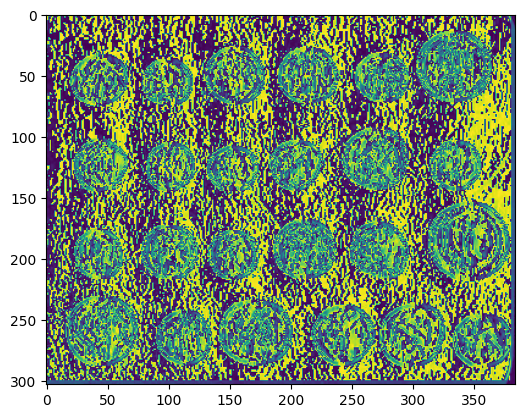

In [18]:
# 3. Convolution operation
def convolution(image: np.ndarray, kernel: np.ndarray) -> np.ndarray:
    for i in range(image.shape[0]-kernel.shape[0]):
        for j in range(image.shape[1]-kernel.shape[1]):
            image[i, j] = np.sum(image[i:i+kernel.shape[0], j:j+kernel.shape[1]] * kernel)
    return image
image=coins()
kernel = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])
plt.imshow(convolution(image, kernel))
# Test your implementation and plot the results

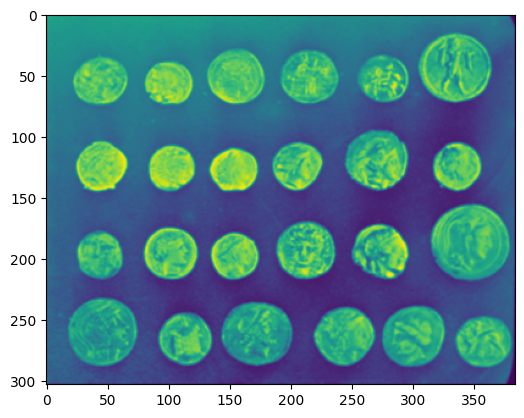

In [27]:
# 4 Denoising using convolution (Gaussian filter)
def denoising(image: np.ndarray) -> np.ndarray:
    image=coins()
    gaussian_filter = np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]]) / 16
    return convolution(image, gaussian_filter)
    

# Test your implementation and plot the results
plt.imshow(denoising(image))

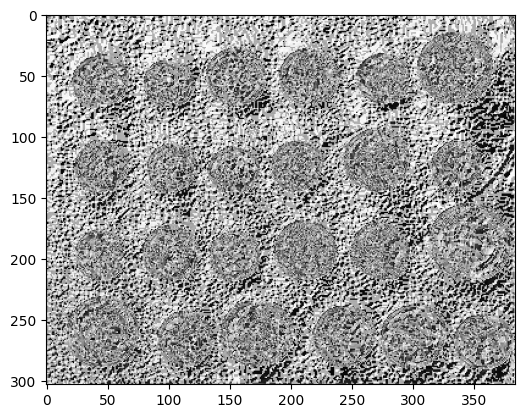

In [20]:

from skimage.data import astronaut
import numpy as np
from skimage.color import rgb2gray
def convolution(image: np.ndarray, kernel: np.ndarray) -> np.ndarray:
    # Get the dimensions of the image and the kernel
    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape
    
    # Calculate the padding size
    pad_height = kernel_height // 2
    pad_width = kernel_width // 2
    
    # Pad the image with zeros on all sides
    padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant')
    
    # Initialize the output image
    output_image = np.zeros_like(image)
    
    # Perform the convolution operation
    for i in range(image_height):
        for j in range(image_width):
            # Extract the region of interest
            region = padded_image[i:i+kernel_height, j:j+kernel_width]
            # Apply the kernel (element-wise multiplication and sum)
            output_image[i, j] = np.sum(region * kernel)
    
    return output_image
# 3. Convolution operation

# 5. Edge detection using convolution (Sobel filter)
def square_root(x: float) -> float:
    return np.sqrt(x)
def squared(x: float) -> float:
    return x**2
def edge_detection(image: np.ndarray) -> np.ndarray:
    if image.ndim == 3:
        image = rgb2gray(image)
    sobel_filter = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    sobel_filter2 = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
    image1=convolution(image, sobel_filter)
    image2=convolution(image, sobel_filter2)
    return np.vectorize(square_root)(np.vectorize(squared)(image1)+np.vectorize(squared)(image2))
plt.imshow(edge_detection(coins()), cmap='gray')
# Test your implementation and plot the results

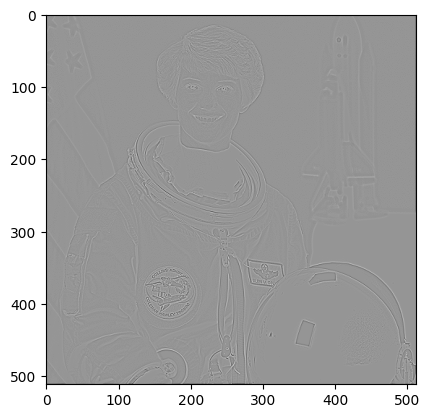

In [26]:
# 6. Image sharpening using convolution (Laplacian filter)
def image_sharpening(image: np.ndarray) -> np.ndarray:
    image = rgb2gray(image)
    return convolution(image, np.array([[0,1,0],[ 1,- 4,1],[ 0,1,0]]))
plt.imshow(image_sharpening(astronaut()),cmap='gray')
# Test your implementation and plot the results

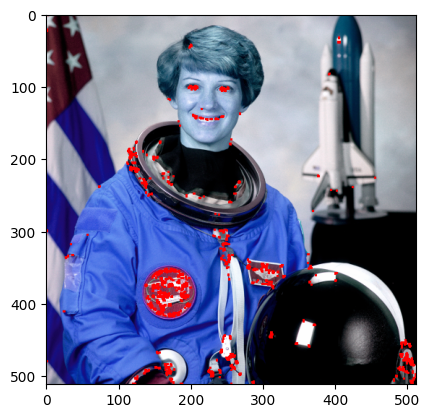

In [40]:
# 7. Detecting corners using convolution (Harris corner detector)


def detect_corners(image: np.ndarray) -> np.ndarray:
    img = image.copy()
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    gray = np.float32(gray)
    dst = cv2.cornerHarris(gray, 2, 3, 0.04)

    # Result is dilated for marking the corners, not important
    dst = cv2.dilate(dst, None)

    # Threshold for an optimal value, it may vary depending on the image.
    img[dst > 0.01 * dst.max()] = [0, 0, 255]

    return img

# Test your implementation and plot the results
img = coins()
corners_detected = detect_corners(cv2.cvtColor(img, cv2.COLOR_GRAY2BGR))
plt.imshow(cv2.cvtColor(corners_detected, cv2.COLOR_BGR2RGB))
corners_detected = detect_corners(astronaut())
plt.imshow(cv2.cvtColor(corners_detected, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
# 8. Detecting points of interest
def detect_points_of_interest(image: np.ndarray) -> np.ndarray:
    pass

# Test your implementation and plot the results

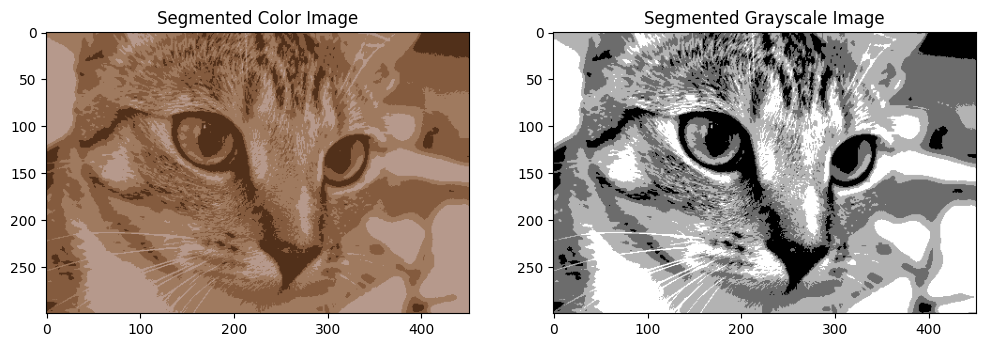

In [6]:
# 9. Image segmentation using K-means clustering


def initialize_centroids(data, k):
    """Randomly initialize centroids from the data points."""
    indices = np.random.choice(data.shape[0], k, replace=False)
    return data[indices]

def assign_clusters(data, centroids):
    """Assign each data point to the nearest centroid."""
    distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)
    return np.argmin(distances, axis=1)

def update_centroids(data, labels, k):
    """Update centroids as the mean of the data points assigned to each cluster."""
    new_centroids = np.zeros((k, data.shape[1]))
    for i in range(k):
        new_centroids[i] = data[labels == i].mean(axis=0)
    return new_centroids

def kmeans(data, k, max_iters=100, tol=1e-4):
    """K-means clustering algorithm."""
    centroids = initialize_centroids(data, k)
    for _ in range(max_iters):
        labels = assign_clusters(data, centroids)
        new_centroids = update_centroids(data, labels, k)
        if np.linalg.norm(new_centroids - centroids) < tol:
            break
        centroids = new_centroids
    return labels, centroids

def image_segmentation(image: np.ndarray, k: int) -> np.ndarray:
    img = image.copy()
    
    # Check if the image is grayscale or RGB
    if len(img.shape) == 2:  # Grayscale image
        Z = img.reshape((-1, 1))
    else:  # RGB image
        Z = img.reshape((-1, 3))
 
    # convert to np.float32
    Z = np.float32(Z)
 
    # Apply K-means clustering
    labels, centers = kmeans(Z, k)
 
    # Now convert back into uint8, and make original image
    centers = np.uint8(centers)
    res = centers[labels.flatten()]
    res2 = res.reshape((img.shape))
 
    return res2

# Test your implementation and plot the results
color_img = cat()  # Load the color image
segmented_color_img = image_segmentation(color_img, 4)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Segmented Color Image")
plt.imshow(segmented_color_img)

gray_img = cv2.cvtColor(cat(), cv2.COLOR_RGB2GRAY)  # Convert to grayscale
segmented_gray_img = image_segmentation(gray_img, 4)
plt.subplot(1, 2, 2)
plt.title("Segmented Grayscale Image")
plt.imshow(segmented_gray_img, cmap='gray')

plt.show()


# TP OpenCV: Hough Line Transform for straight lines detection

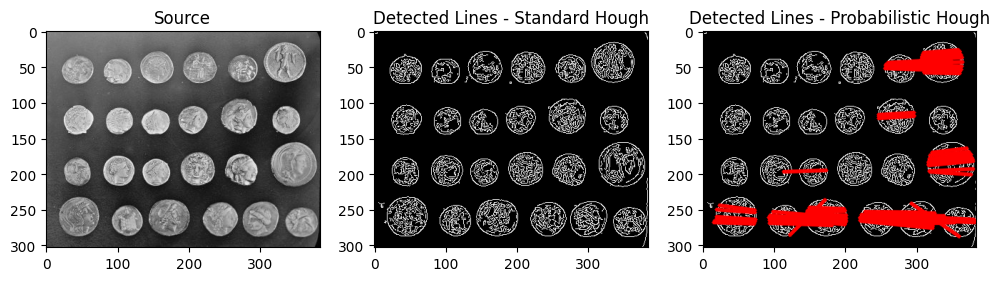

0

In [48]:
import math
# Implement Hough transform to detect lines in an image
def hough_transform(image):
    default_file = 'sudoku.png'
    # Loads an image
    src = image
    # Check if image is loaded fine
    if src is None:
        print ('Error opening image!')
        print ('Usage: hough_lines.py [image_name -- default ' + default_file + '] \n')
        return -1
    
    
    dst = cv2.Canny(src, 50, 200, None, 3)
    
    # Copy edges to the images that will display the results in BGR
    cdst = cv2.cvtColor(dst, cv2.COLOR_GRAY2BGR)
    cdstP = np.copy(cdst)
    
    lines = cv2.HoughLines(dst, 1, np.pi / 180, 150, None, 0, 0)
    
    if lines is not None:
        for i in range(0, len(lines)):
            rho = lines[i][0][0]
            theta = lines[i][0][1]
            a = math.cos(theta)
            b = math.sin(theta)
            x0 = a * rho
            y0 = b * rho
            pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
            pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
            cv2.line(cdst, pt1, pt2, (0,0,255), 3, cv2.LINE_AA)
    
    
    linesP = cv2.HoughLinesP(dst, 1, np.pi / 180, 50, None, 50, 10)
    
    if linesP is not None:
        for i in range(0, len(linesP)):
            l = linesP[i][0]
            cv2.line(cdstP, (l[0], l[1]), (l[2], l[3]), (0,0,255), 3, cv2.LINE_AA)
    
    # Display the results using matplotlib
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 3, 1)
    plt.title("Source")
    plt.imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB))
    
    plt.subplot(1, 3, 2)
    plt.title("Detected Lines - Standard Hough")
    plt.imshow(cv2.cvtColor(cdst, cv2.COLOR_BGR2RGB))
    
    plt.subplot(1, 3, 3)
    plt.title("Detected Lines - Probabilistic Hough")
    plt.imshow(cv2.cvtColor(cdstP, cv2.COLOR_BGR2RGB))
    
    plt.show()
    return 0
    
    cv2.waitKey()
    return 0
hough_transform(coins())
# step 1: load an image that contains lines

# step 2: detect edges in the image

# step 3: apply Hough transform to detect lines

# step 4: plot the results